<a href="https://colab.research.google.com/github/mustafamubashir03/Deep-Learning/blob/main/Supervised_Handwritten_Digits_Detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python


In [2]:
import cv2 as cv
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt



In [3]:
mnist = tf.keras.datasets.mnist.load_data()
(x_train,y_train),(x_test,y_test) = mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=4)
loss,accuracy = model.evaluate(x_test,y_test)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9880 - loss: 0.0372
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9907 - loss: 0.0283
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0214
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0188
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1310


In [11]:
accuracy

0.9729999899864197

In [12]:
loss

0.11799600720405579

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The result is probably 2


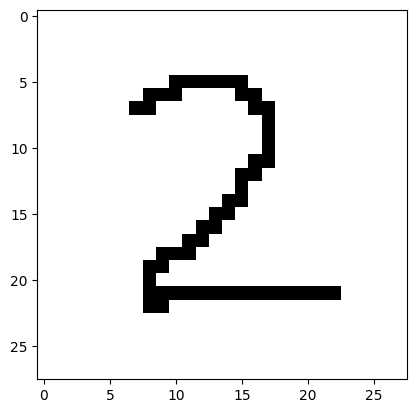

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The result is probably 1


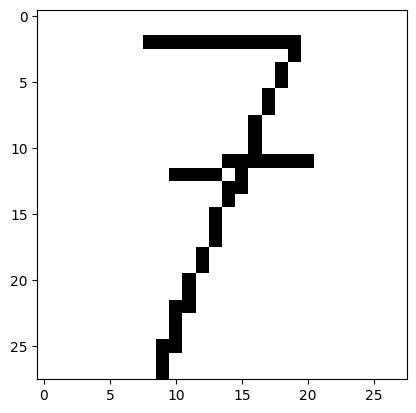

In [18]:
for x in range(1,3):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print("The result is probably",np.argmax(prediction))
  plt.imshow(img[0],cmap=plt.cm.binary)
  plt.show()